In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely import wkt

In [27]:
data_shapes = pd.read_excel("~\Desktop\VDART - OIL FIELDS\PETRO_dataset_080907\PETRO_Onshore_080907.xls")

In [20]:
data_shapes.head()

,PRIMKEY,COUNTRY,FIPSCODE,COWCODE,CONTCODE,SITENUM,NAME,LAT,LONG,RES,RESINFO,LOCSOURCE,FIELDINFO,DISC,DISCPRES,PROD,PRODPRES,OTHERINFO,SOURCEINFO,VERSION
0,AF001PET,Afghanistan,AF,700,3,1,Central Afghanistan,34.53,61.46,PET,oil,"Persits et al., 1998 - Wandrey et al., 1999",3,-9999,3,-9999,3,no confirmation of Petroleum Economist,"Petroleum Economist, 2003",1.1
1,AF002PET,Afghanistan,AF,700,3,2,Central Afghanistan,35.08,62.54,PET,gas,"Persits et al., 1998 - Wandrey et al., 1999",3,-9999,3,-9999,3,no information available,NaN,1.1
2,AF003PET,Afghanistan,AF,700,3,3,Amu-Darya Basin,35.80,64.06,PET,oil and gas,"Persits et al., 1998 - Wandrey et al., 1999",1,1979,1,-9999,3,Dhsanhalikolon field found in 1979,"Kulke, 1994",1.1
3,AF004PET,Afghanistan,AF,700,3,4,Amu-Darya Basin,36.46,65.73,PET,oil and gas,"Persits et al., 1998 - Wandrey et al., 1999",1,1956,1,1967,1,oil found in the area of Sar-i-Pul in 1956 - K...,"Kulke, 1994 - Petroleum Economist, 2002a - Pet...",1.1
4,AF005PET,Afghanistan,AF,700,3,5,Afghan-Tajik Basin,36.79,67.27,PET,oil and gas,"Persits et al., 1998 - Wandrey et al., 1999",2,1977,1,-9999,4,Ali Gul field discovered in 1977,"Petroleum Economist, 2002a - Petroleum Economi...",1.1


In [21]:
data_shapes.tail()

,PRIMKEY,COUNTRY,FIPSCODE,COWCODE,CONTCODE,SITENUM,NAME,LAT,LONG,RES,RESINFO,LOCSOURCE,FIELDINFO,DISC,DISCPRES,PROD,PRODPRES,OTHERINFO,SOURCEINFO,VERSION
914,YM001PET,Yemen,YM,679,2,1,Ma'Rib-Al Jawf Basin,15.50,45.77,PET,oil and gas,"Pollastro et al., 1999a - Petroleum Economist",1,1984,1,1986,1,Alif field discovered in 1984 and came on stre...,"Anonymous, 2001 - Kulke, 1994 - Petroleum Econ...",1.1
915,YM002PET,Yemen,YM,679,2,2,Shabwah Basin,14.97,46.79,PET,oil,"Pollastro et al., 1999a - Petroleum Economist",1,1987,1,1999,2,Amal and Ayad fields found in 1987 and Shabwa ...,"Oil & Gas Directory, 2003 - Petroleum Economis...",1.1
916,YM003PET,Yemen,YM,679,2,3,Shabwah Basin,14.55,48.01,PET,oil and gas,"Pollastro et al., 1999a",3,-9999,3,-9999,3,no confirmation of Petroleum Economist,"Petroleum Economist, 2003",1.1
917,YM004PET,Yemen,YM,679,2,4,Masila-Jeza Basin,15.78,48.10,PET,oil and gas,"Pollastro et al., 1999a",3,-9999,3,-9999,3,no confirmation of Petroleum Economist,"Petroleum Economist, 2003",1.1
918,YM005PET,Yemen,YM,679,2,5,Masila-Jeza Basin,15.65,48.98,PET,oil,"Pollastro et al., 1999a - Petroleum Economist",1,1991,1,1993,1,several discoveries in 1991 - production start...,"Anonymous, 2001 - Nexen, 2003 - Petroleum Econ...",1.1


In [28]:
data_shapes = data_shapes.loc[data_shapes['COUNTRY'] == 'United States of Ameri']

In [29]:
data_shapes.head()

,PRIMKEY,COUNTRY,FIPSCODE,COWCODE,CONTCODE,SITENUM,NAME,LAT,LONG,RES,RESINFO,LOCSOURCE,FIELDINFO,DISC,DISCPRES,PROD,PRODPRES,OTHERINFO,SOURCEINFO,VERSION
807,US001PET,United States of Ameri,US,2,5,1,Northern Alaska,70.96,-156.94,PET,gas,"Petroleum Economist, 2003 - Klett et al., 1997",1,1949,1,1950,1,Barrow field discovered in 1949 and commenced ...,"Magoon et al., year unknown - NPRA, 1998 - Pet...",1.1
808,US002PET,United States of Ameri,US,2,5,2,Northern Alaska,70.73,-155.60,PET,oil,"Petroleum Economist, 2003 - Klett et al., 1997",2,1950,1,-9999,4,Simpson field found in 1950 - in 1998 no produ...,"Magoon et al., year unknown - NPRA, 1998 - Pet...",1.1
809,US003PET,United States of Ameri,US,2,5,3,Northern Alaska,70.24,-149.63,PET,oil and gas,"Earth Sciences and Resources Institute, 1995 -...",1,1967,1,1977,1,Prudhoe Bay field discovered in 1967 and came ...,"Earth Sciences and Resources Institute, 1995 -...",1.1
810,US004PET,United States of Ameri,US,2,5,4,Northern Alaska,69.94,-143.78,PET,oil,"Petroleum Economist, 2003 - Klett et al., 1997",2,1975,1,-9999,4,Flaxman Island field found in 1975 and Point T...,"Earth Sciences and Resources Institute, 1995 -...",1.1
811,US005PET,United States of Ameri,US,2,5,5,Northern Alaska,69.49,-147.69,PET,gas,"Petroleum Economist, 2003 - Klett et al., 1997",2,1969,1,-9999,4,Kavik field discovered in 1969 - in 1998 no pr...,"Magoon et al., year unknown - NPRA, 1998 - Pet...",1.1


In [30]:
data_shapes.shape

(91, 20)

In [31]:
crs = {'init' : 'epsg:4326'}

In [32]:
from shapely.geometry import Point, Polygon

In [34]:
geometry = [Point(xy) for xy in zip(data_shapes['LONG'],data_shapes['LAT'])]

In [42]:
geo_df = gpd.GeoDataFrame(data_shapes, crs = crs, geometry = geometry)

C:\Users\Ram\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


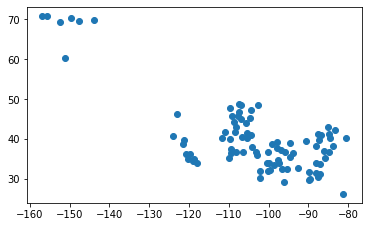

In [43]:
geo_df.plot()

In [47]:
import cartoframes
from cartoframes.auth import set_default_credentials
from cartoframes.viz import Map, Layer, popup_element, size_bins_style
from cartoframes.viz import Map, Layer, basemaps

In [48]:
Map(Layer(geo_df), basemap=basemaps.voyager)